In [2]:
import tensorflow as tf
print('TensorFlow version:', tf.__version__)
import numpy as np

np.set_printoptions(precision=3)

TensorFlow version: 2.3.1


In [3]:
a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]

t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [4]:
t_ones = tf.ones((2, 3))

t_ones.shape

TensorShape([2, 3])

In [5]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [6]:
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)

print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


In [7]:
t_a_new = tf.cast(t_a, tf.int64)

print(t_a_new.dtype)

<dtype: 'int64'>


In [8]:
t = tf.random.uniform(shape=(3, 5))

t_tr = tf.transpose(t)
print(t.shape, ' --> ', t_tr.shape)

(3, 5)  -->  (5, 3)


In [9]:
t = tf.zeros((30,))

t_reshape = tf.reshape(t, shape=(5, 6))

print(t_reshape.shape)

(5, 6)


In [10]:
t = tf.zeros((1, 2, 1, 4, 1))

t_sqz = tf.squeeze(t, axis=(2, 4))

print(t.shape, ' --> ', t_sqz.shape)

(1, 2, 1, 4, 1)  -->  (1, 2, 4)


In [11]:
tf.random.set_seed(1)
t1 = tf.random.uniform(shape=(5, 2), 
                       minval=-1.0,
                       maxval=1.0)

t2 = tf.random.normal(shape=(5, 2), 
                      mean=0.0,
                      stddev=1.0)

In [12]:
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


In [13]:
t4 = tf.math.reduce_mean(t1, axis=0)

print(t4)

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


In [14]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)

print(t5.numpy())

[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]]


In [15]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)

print(t6.numpy())

[[-1.711  0.302]
 [ 0.371 -1.049]]


In [16]:
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()

print(norm_t1)

[1.046 0.293 0.504 0.96  0.383]


In [17]:
np.sqrt(np.sum(np.square(t1), axis=1))

array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)

In [18]:
t = tf.random.uniform((6,))

print(t.numpy())

t_splits = tf.split(t, 3)

[item.numpy() for item in t_splits]

[0.829 0.634 0.515 0.391 0.581 0.048]


[array([0.829, 0.634], dtype=float32),
 array([0.515, 0.391], dtype=float32),
 array([0.581, 0.048], dtype=float32)]

In [19]:
tf.random.set_seed(1)
t = tf.random.uniform((5,))

print(t.numpy())

t_splits = tf.split(t, num_or_size_splits=[3, 2])

[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292]


[array([0.165, 0.901, 0.631], dtype=float32),
 array([0.435, 0.292], dtype=float32)]

In [20]:
A = tf.ones((3,))
B = tf.zeros((2,))
C = tf.concat([A, B], axis=0)
print(C.numpy())

[1. 1. 1. 0. 0.]


In [21]:
A = tf.ones((3,))
B = tf.zeros((3,))
S = tf.stack([A, B], axis=1)
print(S.numpy())

[[1. 0.]
 [1. 0.]
 [1. 0.]]


In [22]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]

ds = tf.data.Dataset.from_tensor_slices(a)

print(ds)

<TensorSliceDataset shapes: (), types: tf.float32>


In [23]:
for item in ds:
    print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [24]:
ds_batch = ds.batch(3)

for i, elem in enumerate(ds_batch, 1):
    print('Пакет {}:'.format(i), elem.numpy())

Пакет 1: [1.2 3.4 7.5]
Пакет 2: [4.1 5.  1. ]


In [25]:
tf.random.set_seed(1)

t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

In [26]:
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)
    
ds_joint = tf.data.Dataset.zip((ds_x, ds_y))

for example in ds_joint:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.605 0.637 0.614]   y:  3


In [27]:
ds_trans = ds_joint.map(lambda x, y: (x*2-1.0, y))

for example in ds_trans:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [-0.67   0.803  0.262]   y:  0
  x:  [-0.131 -0.416  0.285]   y:  1
  x:  [ 0.952 -0.13   0.32 ]   y:  2
  x:  [0.21  0.273 0.229]   y:  3


In [28]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x))

for example in ds:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.605 0.637 0.614]   y:  3


In [29]:
ds = ds_joint.batch(batch_size=3,
                    drop_remainder=False)

batch_x, batch_y = next(iter(ds))

print('Пакет-x: \n', batch_x.numpy())

print('Пакет-y:   ', batch_y.numpy())

Batch-x: 
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]
Batch-y:    [0 1 2]


In [30]:
ds = ds_joint.batch(3).repeat(count=2)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


In [31]:
ds = ds_joint.repeat(count=2).batch(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


In [33]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(4).batch(2).repeat(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [34]:
tf.random.set_seed(1)

ds = ds_joint.shuffle(4).batch(2).repeat(20)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]
6 (2, 3) [1 3]
7 (2, 3) [2 0]
8 (2, 3) [1 2]
9 (2, 3) [3 0]
10 (2, 3) [3 0]
11 (2, 3) [2 1]
12 (2, 3) [3 0]
13 (2, 3) [1 2]
14 (2, 3) [3 0]
15 (2, 3) [2 1]
16 (2, 3) [2 3]
17 (2, 3) [0 1]
18 (2, 3) [1 2]
19 (2, 3) [0 3]
20 (2, 3) [0 1]
21 (2, 3) [2 3]
22 (2, 3) [3 2]
23 (2, 3) [0 1]
24 (2, 3) [3 0]
25 (2, 3) [1 2]
26 (2, 3) [1 3]
27 (2, 3) [2 0]
28 (2, 3) [2 1]
29 (2, 3) [0 3]
30 (2, 3) [2 3]
31 (2, 3) [0 1]
32 (2, 3) [3 1]
33 (2, 3) [2 0]
34 (2, 3) [3 2]
35 (2, 3) [1 0]
36 (2, 3) [3 0]
37 (2, 3) [2 1]
38 (2, 3) [0 2]
39 (2, 3) [3 1]


In [36]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


Форма изображения:  (900, 1200, 3)
Форма изображения:  (900, 1200, 3)
Форма изображения:  (900, 742, 3)
Форма изображения:  (800, 1200, 3)
Форма изображения:  (800, 1200, 3)
Форма изображения:  (900, 1200, 3)


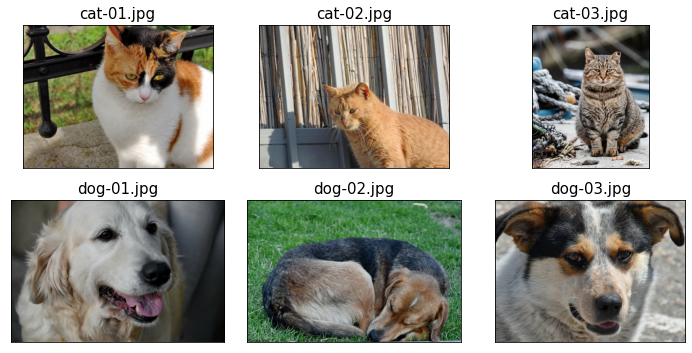

In [37]:
import matplotlib.pyplot as plt
import os


fig = plt.figure(figsize=(10, 5))
for i,file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Форма изображения: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
plt.tight_layout()
plt.show()

In [38]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [39]:

ds_files_labels = tf.data.Dataset.from_tensor_slices(
    (file_list, labels))

for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'cat_dog_images\\cat-01.jpg' 0
b'cat_dog_images\\cat-02.jpg' 0
b'cat_dog_images\\cat-03.jpg' 0
b'cat_dog_images\\dog-01.jpg' 1
b'cat_dog_images\\dog-02.jpg' 1
b'cat_dog_images\\dog-03.jpg' 1


(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 1
(80, 120, 3) 1
(80, 120, 3) 1


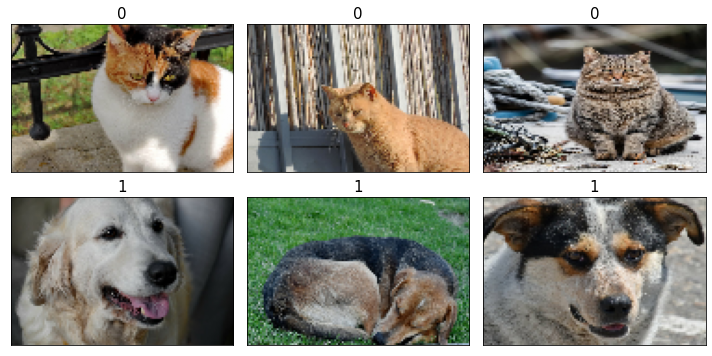

In [40]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0

    return image, label

img_width, img_height = 120, 80

ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 5))
for i,example in enumerate(ds_images_labels):
    print(example[0].shape, example[1].numpy())
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), 
                 size=15)
    
plt.tight_layout()
plt.show()

In [55]:
import tensorflow_datasets as tfds

print(len(tfds.list_builders()))
print(tfds.list_builders()[:5])

246
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


In [56]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'dart',
 'davis',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k

In [57]:
celeba_bldr = tfds.builder('celeb_a')

print(celeba_bldr.info.features)
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features.keys())
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features['image'])
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features['attributes'].keys())
print('\n', 30*"=", '\n')
print(celeba_bldr.info.citation)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': tf.bool,
        'Arched_Eyebrows': tf.bool,
        'Attractive': tf.bool,
        'Bags_Under_Eyes': tf.bool,
        'Bald': tf.bool,
        'Bangs': tf.bool,
        'Big_Lips': tf.bool,
        'Big_Nose': tf.bool,
        'Black_Hair': tf.bool,
        'Blond_Hair': tf.bool,
        'Blurry': tf.bool,
        'Brown_Hair': tf.bool,
        'Bushy_Eyebrows': tf.bool,
        'Chubby': tf.bool,
        'Double_Chin': tf.bool,
        'Eyeglasses': tf.bool,
        'Goatee': tf.bool,
        'Gray_Hair': tf.bool,
        'Heavy_Makeup': tf.bool,
        'High_Cheekbones': tf.bool,
        'Male': tf.bool,
        'Mouth_Slightly_Open': tf.bool,
        'Mustache': tf.bool,
        'Narrow_Eyes': tf.bool,
        'No_Beard': tf.bool,
        'Oval_Face': tf.bool,
        'Pale_Skin': tf.bool,
        'Pointy_Nose': tf.bool,
        'Receding_Hairline': tf.bool,
        'Rosy_Cheeks': tf.bool,
        'Sidebu

In [58]:
import tensorflow_datasets as tfds
celeba_bldr.download_and_prepare()

NonMatchingChecksumError: Artifact https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM, downloaded to C:\Users\Миша\tensorflow_datasets\downloads\ucexport_download_id_0B7EVK8r0v71pZjFTYXZWM3FlDDaXUAQO8EGH_a7VqGNLRtW52mva1LzDrb-V723OQN8.tmp.7fc4c58f1dfc463c94691469f7c71466\uc, has wrong checksum. Expected: UrlInfo(size=1.34 GiB, checksum='46fb89443c578308acf364d7d379fe1b9efb793042c0af734b6112e4fd3a8c74', filename='img_align_celeba.zip'). Got: UrlInfo(size=3.04 KiB, checksum='179737049ad421f99b7e0e69697859d09180e04280e27cb77eb3e2b6b3f7a944', filename='uc').To debug, see: https://www.tensorflow.org/datasets/overview#fixing_nonmatchingchecksumerror

In [65]:
datasets = celeba_bldr.as_dataset(shuffle_files=False)

datasets.keys()

AssertionError: Dataset celeb_a: could not find data in C:\Users\Миша\tensorflow_datasets. Please make sure to call dataset_builder.download_and_prepare(), or pass download=True to tfds.load() before trying to access the tf.data.Dataset object.

In [66]:
ds_train = ds_train.map(lambda item: 
     (item['image'], tf.cast(item['attributes']['Male'], tf.int32)))

NameError: name 'ds_train' is not defined

In [67]:
import tensorflow as tf
ds_train = datasets['train']
assert isinstance(ds_train, tf.data.Dataset)

example = next(iter(ds_train))
print(type(example))
print(example.keys())

NameError: name 'datasets' is not defined

In [68]:
ds_train = ds_train.map(lambda item: 
     (item['image'], tf.cast(item['attributes']['Male'], tf.int32)))

NameError: name 'ds_train' is not defined

In [69]:
mnist, mnist_info = tfds.load('mnist', with_info=True,
                              shuffle_files=False)

print(mnist_info)

print(mnist.keys())

Dataset mnist downloaded and prepared to C:\Users\Миша\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\Миша\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http:

(10, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6], shape=(10,), dtype=int64)


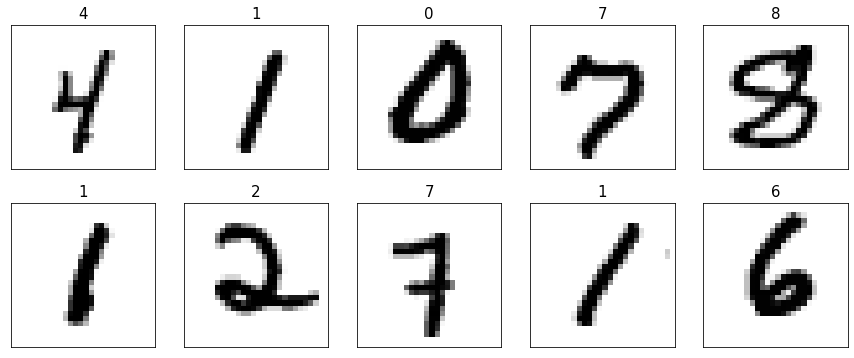

In [70]:
ds_train = mnist['train']

assert isinstance(ds_train, tf.data.Dataset)

ds_train = ds_train.map(lambda item: 
     (item['image'], item['label']))

ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

fig = plt.figure(figsize=(15, 6))
for i,(image,label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title('{}'.format(label), size=15)
    
plt.show()

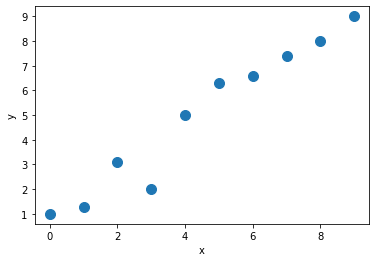

In [71]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1,
                    2.0, 5.0, 6.3,
                    6.6, 7.4, 8.0,
                    9.0])


plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [72]:
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)

ds_train_orig = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train_norm, tf.float32),
     tf.cast(y_train, tf.float32)))

In [73]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')

    def call(self, x):
        return self.w*x + self.b


model = MyModel()

model.build(input_shape=(None, 1))
model.summary()


Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [75]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

yt = tf.convert_to_tensor([1.0])
yp = tf.convert_to_tensor([1.5])

loss_fn(yt, yp)

<tf.Tensor: shape=(), dtype=float32, numpy=0.25>

In [76]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [78]:
tf.random.set_seed(1)

num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))


ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)

Ws, bs = [], []

for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())

    bx, by = batch
    loss_val = loss_fn(model(bx), by)

    train(model, bx, by, learning_rate=learning_rate)
    if i%log_steps==0:
        print('Эпоха {:4d} Шаг {:2d} Потеря {:6.4f}'.format(
              int(i/steps_per_epoch), i, loss_val))

Эпоха    0 Шаг  0 Потеря 0.1104
Эпоха   10 Шаг 100 Потеря 0.0792
Эпоха   20 Шаг 200 Потеря 0.0864
Эпоха   30 Шаг 300 Потеря 0.0142
Эпоха   40 Шаг 400 Потеря 0.2893
Эпоха   50 Шаг 500 Потеря 0.2822
Эпоха   60 Шаг 600 Потеря 0.0755
Эпоха   70 Шаг 700 Потеря 0.0751
Эпоха   80 Шаг 800 Потеря 0.7723
Эпоха   90 Шаг 900 Потеря 2.3895
Эпоха  100 Шаг 1000 Потеря 0.2424
Эпоха  110 Шаг 1100 Потеря 0.1356
Эпоха  120 Шаг 1200 Потеря 0.0074
Эпоха  130 Шаг 1300 Потеря 0.0662
Эпоха  140 Шаг 1400 Потеря 0.0402
Эпоха  150 Шаг 1500 Потеря 0.0736
Эпоха  160 Шаг 1600 Потеря 0.2545
Эпоха  170 Шаг 1700 Потеря 2.4163
Эпоха  180 Шаг 1800 Потеря 0.0699
Эпоха  190 Шаг 1900 Потеря 0.2529


Финальные параметры: 2.7057889 4.968529


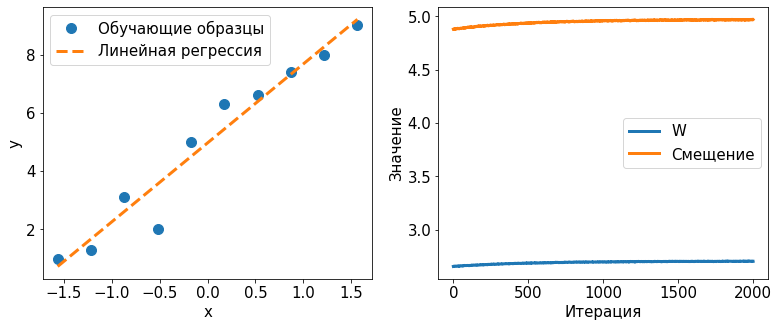

In [80]:
print('Финальные параметры:', model.w.numpy(), model.b.numpy())

X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Обучающие образцы', 'Линейная регрессия'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['W', 'Смещение'], fontsize=15)
ax.set_xlabel('Итерация', size=15)
ax.set_ylabel('Значение', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [81]:
tf.random.set_seed(1)
model = MyModel()

model.compile(optimizer='sgd', 
              loss=loss_fn,
              metrics=['mae', 'mse'])

In [82]:
model.fit(X_train_norm, y_train, 
          epochs=num_epochs, batch_size=batch_size,
          verbose=1)

Epoch 1/200
 1/10 [==>...........................] - ETA: 0s - loss: 9.6100 - mae: 3.1000 - mse: 9.6100WARNING:tensorflow:Callbacks method `on_train_batch_begin` is slow compared to the batch time (batch time: 0.0000s vs `on_train_batch_begin` time: 0.0010s). Check your callbacks.


10/10 [==============================] - 0s 696us/step - loss: 27.8723 - mae: 4.5654 - mse: 27.8723
Epoch 2/200
10/10 [==============================] - 0s 400us/step - loss: 18.6586 - mae: 3.7446 - mse: 18.6586
Epoch 3/200
10/10 [==============================] - 0s 500us/step - loss: 12.5239 - mae: 3.0454 - mse: 12.5239
Epoch 4/200
10/10 [==============================] - 0s 400us/step - loss: 8.4670 - mae: 2.4907 - mse: 8.4670
Epoch 5/200
10/10 [==============================] - 0s 500us/step - loss: 5.7632 - mae: 2.0567 - mse: 5.7632
Epoch 6/200
10/10 [==============================] - 0s 400us/step - loss: 3.9697 - mae: 1.7232 - mse: 3.9697
Epoch 7/200
10/10 [==============================] - 0s 400us/step - loss: 2.7766 - mae: 1.4752 - mse: 2.7766
Epoch 8/200
10/10 [==============================] - 0s 400us/step - loss: 1.9861 - mae: 1.2578 - mse: 1.9861
Epoch 9/200
10/10 [==============================] - 0s 400us/step - loss: 1.4572 - mae: 1.0978 - mse: 1.4572
Epoch 10/200
10/

Epoch 75/200
10/10 [==============================] - 0s 400us/step - loss: 0.4133 - mae: 0.4894 - mse: 0.4133
Epoch 76/200
10/10 [==============================] - 0s 400us/step - loss: 0.4136 - mae: 0.4939 - mse: 0.4136
Epoch 77/200
10/10 [==============================] - 0s 500us/step - loss: 0.4139 - mae: 0.4824 - mse: 0.4139
Epoch 78/200
10/10 [==============================] - 0s 400us/step - loss: 0.4136 - mae: 0.4811 - mse: 0.4136
Epoch 79/200
10/10 [==============================] - 0s 400us/step - loss: 0.4137 - mae: 0.4854 - mse: 0.4137
Epoch 80/200
10/10 [==============================] - 0s 400us/step - loss: 0.4136 - mae: 0.4842 - mse: 0.4136
Epoch 81/200
10/10 [==============================] - 0s 500us/step - loss: 0.4139 - mae: 0.4923 - mse: 0.4139
Epoch 82/200
10/10 [==============================] - 0s 400us/step - loss: 0.4137 - mae: 0.4861 - mse: 0.4137
Epoch 83/200
10/10 [==============================] - 0s 400us/step - loss: 0.4135 - mae: 0.4913 - mse: 0.4135
E

10/10 [==============================] - 0s 400us/step - loss: 0.4139 - mae: 0.4887 - mse: 0.4139
Epoch 149/200
10/10 [==============================] - 0s 400us/step - loss: 0.4132 - mae: 0.4858 - mse: 0.4132
Epoch 150/200
10/10 [==============================] - 0s 400us/step - loss: 0.4140 - mae: 0.4936 - mse: 0.4140
Epoch 151/200
10/10 [==============================] - 0s 400us/step - loss: 0.4139 - mae: 0.4885 - mse: 0.4139
Epoch 152/200
10/10 [==============================] - 0s 400us/step - loss: 0.4139 - mae: 0.4876 - mse: 0.4139
Epoch 153/200
10/10 [==============================] - 0s 400us/step - loss: 0.4133 - mae: 0.4937 - mse: 0.4133
Epoch 154/200
10/10 [==============================] - 0s 400us/step - loss: 0.4140 - mae: 0.4925 - mse: 0.4140
Epoch 155/200
10/10 [==============================] - 0s 400us/step - loss: 0.4135 - mae: 0.4933 - mse: 0.4135
Epoch 156/200
10/10 [==============================] - 0s 400us/step - loss: 0.4139 - mae: 0.4902 - mse: 0.4139
Epoch 

2.7067394 4.9657216


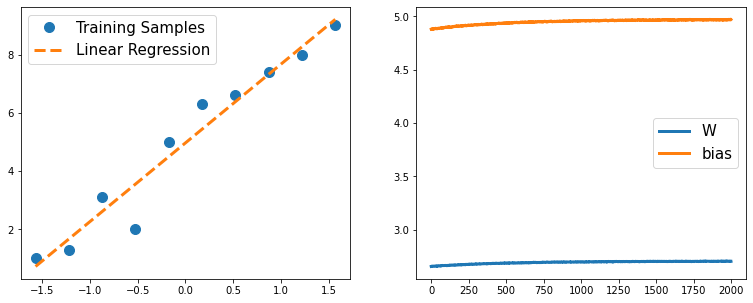

In [83]:
print(model.w.numpy(), model.b.numpy())


X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training Samples', 'Linear Regression'], fontsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['W', 'bias'], fontsize=15)
plt.show()

In [84]:
import tensorflow_datasets as tfds



iris, iris_info = tfds.load('iris', with_info=True)

print(iris_info)

Dataset iris downloaded and prepared to C:\Users\Миша\tensorflow_datasets\iris\2.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='iris',
    full_name='iris/2.0.0',
    description="""
    This is perhaps the best known database to be found in the pattern recognition
    literature. Fisher's paper is a classic in the field and is referenced
    frequently to this day. (See Duda & Hart, for example.) The data set contains
    3 classes of 50 instances each, where each class refers to a type of iris
    plant. One class is linearly separable from the other 2; the latter are NOT
    linearly separable from each other.
    """,
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    data_path='C:\\Users\\Миша\\tensorflow_datasets\\iris\\2.0.0',
    download_size=4.44 KiB,
    dataset_size=7.62 KiB,
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
 

In [85]:
tf.random.set_seed(1)

ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)

print(next(iter(ds_orig)))

ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.5, 3. , 5.2, 2. ], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=2>}


In [86]:
n = 0
for example in ds_train_orig:
    n += 1
print(n)

n = 0
for example in ds_test:
    n += 1
print(n)

100
50


In [87]:
iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='sigmoid', 
                          name='fc1', input_shape=(4,)),
    tf.keras.layers.Dense(3, name='fc2', activation='softmax')])

iris_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [96]:
iris_model.save('iris-classifier.h5', 
                overwrite=True,
                include_optimizer=True,
                save_format='h5')

In [97]:
iris_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [98]:
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size)

ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)


history = iris_model.fit(ds_train, epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch, 
                         verbose=0)

ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:155 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential expects 1 inputs, but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 4) dtype=float32>, <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>]


In [99]:
iris_model_new = tf.keras.models.load_model('iris-classifier.h5')

iris_model_new.summary()
results = iris_model_new.evaluate(ds_test.batch(50), verbose=0)
print('Потеря при испытании: {:.4f}   Правильность при испытании.: {:.4f}'.format(*results))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:155 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential expects 1 inputs, but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 4) dtype=float32>, <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>]


In [100]:
labels_train = []
for i,item in enumerate(ds_train_orig):
    labels_train.append(item[1].numpy())
    
labels_test = []
for i,item in enumerate(ds_test):
    labels_test.append(item[1].numpy())
print('Training Set: ',len(labels_train), 'Test Set: ', len(labels_test))

KeyError: 1

In [101]:
import numpy as np

X = np.array([1, 1.4, 2.5]) ## first value must be 1
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(X, w))

P(y=1|x) = 0.888


In [103]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Входные элементы: \n', Z)

print('Выходные элементы:\n', y_probas)

Входные элементы: 
 [1.78 0.76 1.65]
Выходные элементы:
 [0.856 0.681 0.839]


In [104]:
y_class = np.argmax(Z, axis=0)
print('Спрогнозированная метка класса: %d' % y_class)

Спрогнозированная метка класса: 0


In [106]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Вероятность:\n', y_probas)

np.sum(y_probas)

Вероятность:
 [0.447 0.161 0.392]


1.0

In [107]:
import tensorflow as tf

Z_tensor = tf.expand_dims(Z, axis=0)
tf.keras.activations.softmax(Z_tensor)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.447, 0.161, 0.392]])>

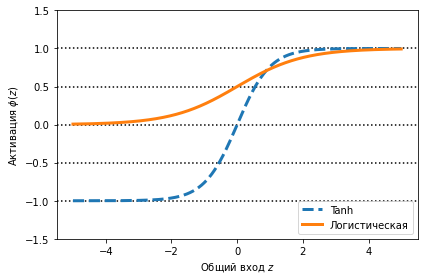

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('Общий вход $z$')
plt.ylabel('Активация $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,
    linewidth=3, linestyle='--',
    label='Tanh')
plt.plot(z, log_act,
    linewidth=3,
    label='Логистическая')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [110]:
np.tanh(z)

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [111]:
import tensorflow as tf

tf.keras.activations.tanh(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=array([-1., -1., -1., ...,  1.,  1.,  1.])>

In [112]:
from scipy.special import expit

expit(z)

array([0.007, 0.007, 0.007, ..., 0.993, 0.993, 0.993])

In [113]:
tf.keras.activations.sigmoid(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=array([0.007, 0.007, 0.007, ..., 0.993, 0.993, 0.993])>